Isometric Map (Isomap)
===

* *0:00 min* | Última modificación: Septiembre 21, 2021 | YouTube

Metodología
---

Es una metodología para la reducción de la dimensionalidad de los datos con fines exploratorios únicamente.

La metodología opera de la siguiente manera:

* Los patrones están organizados en una tabla donde las filas representan los puntos y las columnas las dimensiones.


* Se realiza la búsqueda de los $k$ vecinos más cercanos.


* Se construye una representación de un grafo donde los nodos son los patrones originales. Las conexiones vinculan cada punto con sus $k$ vecinos más cercanos. El costo asociado a cada conexión es la distancia entre los dos puntos.


* Se construye una matriz de distancia entre los patrones. Esta distancia se computa como la distancia más corta entre dichos puntos (Algoritmo de Djikstra).


* Se aplica MDS (Multidimensional scaling) para reducir las dimensiones de la matriz de distancias (columnas).

![isomap.png](assets/isomap.png)

Ejemplo
---

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

display(
    n_samples,
    n_features,
)

1083

64

Cada dígito está representado por una matriz de 8 x 8 pixels.

![digits_dataset.png](assets/digits_dataset.png)

In [2]:
import numpy as np
from sklearn.manifold import Isomap

isomap = Isomap(
    # ------------------------------------------------------
    # number of neighbors to consider for each point.
    n_neighbors=30,
    # ------------------------------------------------------
    # number of coordinates for the manifold
    n_components=2,
    # ------------------------------------------------------
    # Method to use in finding shortest path.
    #   'auto'
    #   'FW' - Floyd-Warshall algorithm.
    #   ‘D’ - Dijkstra’s algorithm.
    path_method="auto",
    # ------------------------------------------------------
    # Algorithm to use for nearest neighbors search
    #   'auto'
    #   'brute'
    #   'kd_tree'
    #   'ball_tree'
    neighbors_algorithm="auto",
)

X_projected = isomap.fit_transform(X)

#
# Retorna un objeto con las siguientes componentes:
#   embedding_
#   kernel_pca_
#   nbrs_ (nearest neighbors instance)
#   dist_matrix_ (geodesic distance matrix)
#

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_scaled = (X_projected - x_min) / (x_max - x_min)

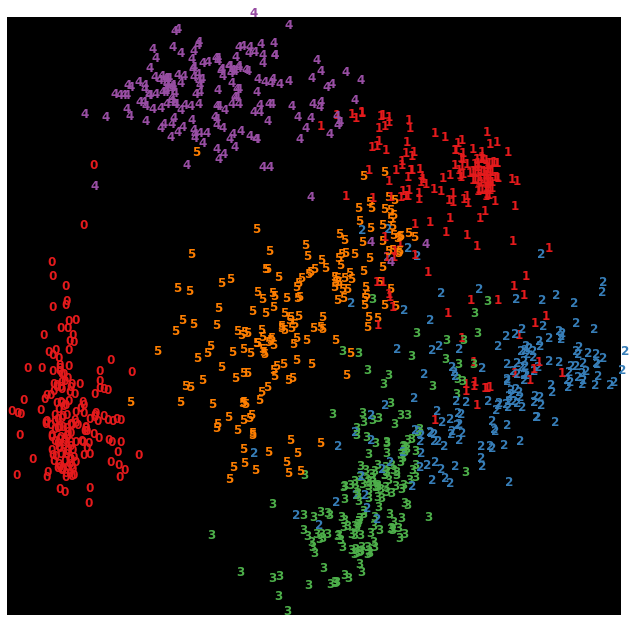

In [3]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox

plt.figure(figsize=(11, 11))
plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )


plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()